In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
#import tensorflow as tf
#from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('data_sets/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv('data_sets/test.csv')
ori_test_df = test_df.copy()  # copying original test set for later usage
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test_df.shape

(418, 11)

It can be seen that the test data does not have the **ground truth** values

In [7]:
# encode the categorical column to numerical values with dictionary (Important piece of code) : NOT AN ESSENTIAL CODE HERE 
# transform_dic = {'Sex': {"female":0, "male":1},
#                'Embarked' : {'C':0, 'Q':1, 'S':2}}
# tran_df = df.replace(transform_dic)
# tran_df.head()

## Checking Null values

In [5]:
# Null values contained in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

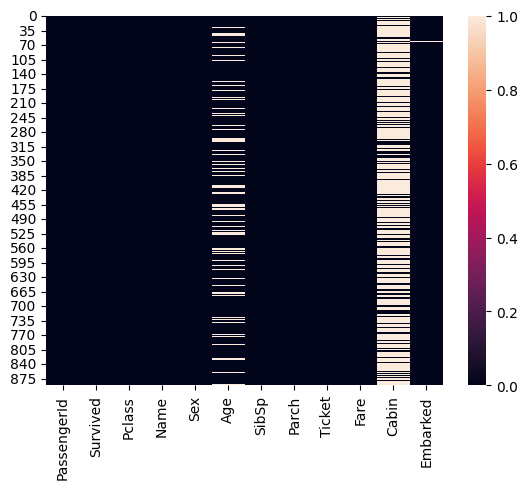

In [6]:
# Null values in a graphical format
sns.heatmap(df.isnull())

There are some null values in the column **Age** and **Cabin**. But since both the variables are not significant for our model we'll drop those columns

In [7]:
df = df.drop(['Age','Cabin','Name','Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S


## Dummying all categorical variables

In [8]:
df = pd.get_dummies(df, columns=['Sex'])
df = pd.get_dummies(df, columns=['Embarked'])
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,0,7.2500,0,1,0,0,1
1,2,1,1,1,0,71.2833,1,0,1,0,0
2,3,1,3,0,0,7.9250,1,0,0,0,1
3,4,1,1,1,0,53.1000,1,0,0,0,1
4,5,0,3,0,0,8.0500,0,1,0,0,1


## Applying Logistic Regression

In [9]:
# Labels of the data set
y = pd.DataFrame(df['Survived'])

# establish the data, X dropping labels and PassengerId
X = df.drop(columns = ['PassengerId','Survived'])
X

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,7.2500,0,1,0,0,1
1,1,1,0,71.2833,1,0,1,0,0
2,3,0,0,7.9250,1,0,0,0,1
3,1,1,0,53.1000,1,0,0,0,1
4,3,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,0,1,0,0,1
887,1,0,0,30.0000,1,0,0,0,1
888,3,1,2,23.4500,1,0,0,0,1
889,1,0,0,30.0000,0,1,1,0,0


In [10]:
# Train and test set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 21)

## Scaling the trining data

Now since it is visible that data in **X** has values in different numerical scales, to get ecerything best usable with the model, it is essential to scale the data with a suitable scalar for this we use **StandardScalar** from Scikit-Learn.

In [11]:
scal = StandardScaler()
X_train_scaled = scal.fit_transform(X_train)
X_test_scaled = scal.transform(X_test)
X_train_scaled

array([[ 0.82113821, -0.4868351 , -0.4560416 , ...,  2.15003291,
        -0.31884728, -1.63676887],
       [-0.3902439 , -0.4868351 , -0.4560416 , ..., -0.46510916,
        -0.31884728,  0.61095981],
       [-0.3902439 ,  0.44613506, -0.4560416 , ..., -0.46510916,
        -0.31884728,  0.61095981],
       ...,
       [-0.3902439 , -0.4868351 , -0.4560416 , ..., -0.46510916,
        -0.31884728,  0.61095981],
       [ 0.82113821,  3.24504552,  0.82603761, ..., -0.46510916,
        -0.31884728,  0.61095981],
       [ 0.82113821, -0.4868351 , -0.4560416 , ...,  2.15003291,
        -0.31884728, -1.63676887]])

In [12]:
# selection of the model and fitting 
model = LogisticRegression( random_state = 0)
model.fit(X_train_scaled, y_train)

C:\Users\thisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

## Predictions

In [13]:
predictions = model.predict(X_test_scaled)
predictions

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

## Accuracy of the model
Sklearn's model.score(X,y) calculation is based on co-efficient of determination i.e R^2 that takes model.score= (X_test,y_test). The y_predicted need not be supplied externally, rather it calculates y_predicted internally and uses it in the calculations.

This is how scikit-learn calculates: **model.score(X_test,y_test)**

**u = ((y_test - y_predicted) ** 2).sum()**

**v = ((y_test - y_test.mean()) ** 2).sum()**

**score = 1 - (u/v)**

This is y_test:

In [14]:
# How acurate the predicted outputs from LR
model.score(X_test_scaled, y_test)

0.7966101694915254

This implies that **79.66%** times the model can predict the correct output. To increase the accuracy more we are going to do the logistic regression with some added regularization so the extreme values are peanalized.

In [15]:
log_reg_1 = LogisticRegression( random_state = 0,
                              C = 0.5,  # regularization parameter
                               fit_intercept = True,
                              ).fit(X_train_scaled, y_train)

C:\Users\thisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# Evaluate the accuracy of the model
log_reg_1.score(X_test_scaled, y_test)

0.7966101694915254

This indicates that for this data set by changing the regularization parameter does not increase the accuracy

### confusion matrix

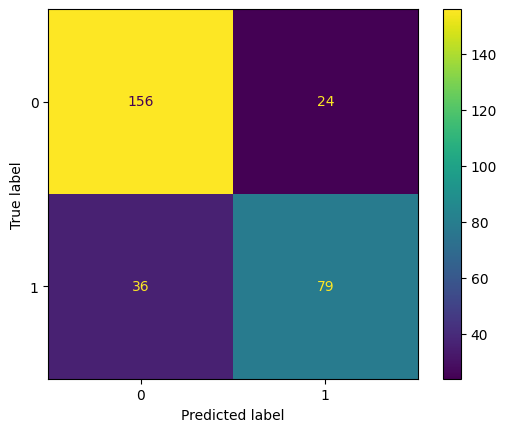

In [17]:
cm = confusion_matrix(y_test, predictions, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

Looking at the accuracy and confusion matrix it can be seen that the model **does not perform well** so selecting another classification algorithm is preffered.

## Get the the model Ready for deployment

In [18]:
# Create a Pickle file to dump the model
import pickle
pickle_out = open("log_reg_class.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

# Prediction on the given test data set (test.csv)

<Axes: >

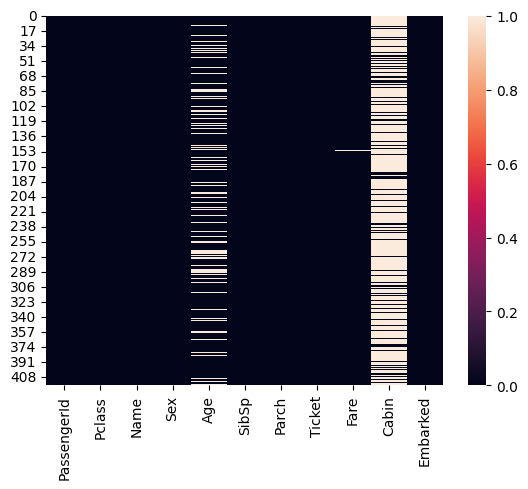

In [34]:
# Null values in a graphical format
sns.heatmap(test_df.isnull())

In [36]:
# drop the columns 'Name', 'Age', 'Cabin' & 'Ticket'
test_df = test_df.drop(columns = ['Name', 'Age', 'Cabin', 'Ticket'], axis =1)
test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,892,3,male,0,0,7.8292,Q
1,893,3,female,1,0,7.0000,S
2,894,2,male,0,0,9.6875,Q
3,895,3,male,0,0,8.6625,S
4,896,3,female,1,1,12.2875,S


<Axes: >

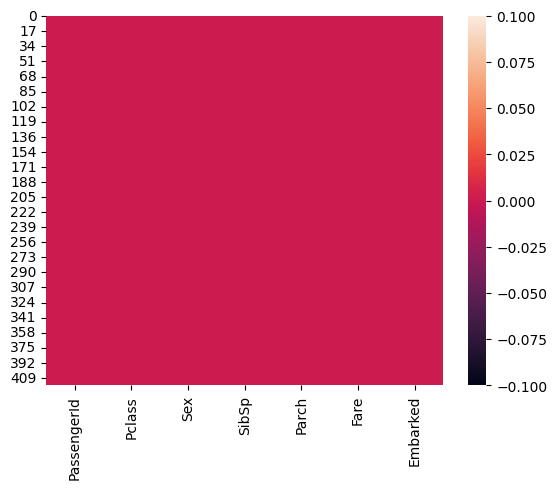

In [57]:
# drop the rowa which consist od null values
test_df = test_df.dropna(subset=['Fare'])  # since it is visible above that there is a null value in 'Fare'

sns.heatmap(test_df.isnull())

In [58]:
## Dumyying variables
test_df = pd.get_dummies(test_df, columns=['Sex'])
test_df = pd.get_dummies(test_df, columns=['Embarked'])
test_df.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,0,7.8292,0,1,0,1,0
1,893,3,1,0,7.0000,1,0,0,0,1
2,894,2,0,0,9.6875,0,1,0,1,0
3,895,3,0,0,8.6625,0,1,0,0,1
4,896,3,1,1,12.2875,1,0,0,0,1


In [60]:
## Scaling test data
X_test_df = test_df.drop(columns = ['PassengerId'])
X_test_df_scaled = scal.fit_transform(X_test_df)
X_test_df_scaled

array([[ 0.87532977, -0.50021819, -0.40080432, ..., -0.56904264,
         2.83993264, -1.34817194],
       [ 0.87532977,  0.61524163, -0.40080432, ..., -0.56904264,
        -0.35212103,  0.74174515],
       [-0.31363607, -0.50021819, -0.40080432, ..., -0.56904264,
         2.83993264, -1.34817194],
       ...,
       [ 0.87532977, -0.50021819, -0.40080432, ..., -0.56904264,
        -0.35212103,  0.74174515],
       [ 0.87532977, -0.50021819, -0.40080432, ..., -0.56904264,
        -0.35212103,  0.74174515],
       [ 0.87532977,  0.61524163,  0.61831399, ...,  1.75733756,
        -0.35212103, -1.34817194]])

In [63]:
## Doing the predictions
test_pred = model.predict(X_test_df_scaled)
test_pred.shape

(417,)

In [66]:
# Saving the total data set with predictions to a .csv file
ori_test_df = ori_test_df.dropna(subset=['Fare'])
ori_test_df.shape

(417, 11)

In [68]:
ori_test_df["Prediction_survived"] = test_pred
ori_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prediction_survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [69]:
# write the predictions to a .csv file
ori_test_df.to_csv('Log_reg_with_correct_predictions.csv')